# Testing HotVis on the tube paths

In [1]:
import csv
from HotVisFunctions import *
import pandas as pd
import numpy as np

In [2]:

def split_path_data(data: pp.PathData, training_percentile: float):
    training_data = pp.PathData(data.mapping)
    test_data = pp.PathData(data.mapping)
    split_indices = torch.rand(data.num_paths)
    for i in range(data.num_paths):
        if split_indices[i] <= training_percentile:
            training_data.append_walk(data.get_walk(i))
        else:
            test_data.append_walk(data.get_walk(i))
    return training_data, test_data


In [3]:
# load tube
tube = pp.PathData.from_ngram("graphs/Tube/tube.ngram")
#tube, tube_test = split_path_data(tube, 0.7)

In [4]:
print(tube.mapping)

Acton Town -> 0
Aldgate -> 1
Aldgate East -> 2
Alperton -> 3
Amersham -> 4
Angel -> 5
Archway -> 6
Arnos Grove -> 7
Arsenal -> 8
Baker Street -> 9
Balham -> 10
Bank / Monument -> 11
Barbican -> 12
Barking -> 13
Barkingside -> 14
Barons Court -> 15
Bayswater -> 16
Becontree -> 17
Belsize Park -> 18
Bermondsey -> 19
Bethnal Green -> 20
Blackfriars -> 21
Blackhorse Road -> 22
Bond Street -> 23
Borough -> 24
Boston Manor -> 25
Bounds Green -> 26
Bow Road -> 27
Brent Cross -> 28
Brixton -> 29
Bromley-by-Bow -> 30
Buckhurst Hill -> 31
Burnt Oak -> 32
Caledonian Road -> 33
Camden Town -> 34
Canada Water -> 35
Canary Wharf -> 36
Canning Town -> 37
Cannon Street -> 38
Canons Park -> 39
Chalfont & Latimer -> 40
Chalk Farm -> 41
Chancery Lane -> 42
Charing Cross -> 43
Chesham -> 44
Chigwell -> 45
Chiswick Park -> 46
Chorleywood -> 47
Clapham Common -> 48
Clapham North -> 49
Clapham South -> 50
Cockfosters -> 51
Colindale -> 52
Colliers Wood -> 53
Covent Garden -> 54
Croxley -> 55
Dagenham East ->

In [5]:
layout_2 = HotVis(tube, 2, 50000, 3, alpha=[1, 0.5], force=10)
layout_3 =  HotVis(tube, 3, 50000, 3, alpha=[1, 0.5, 0.3], force=10)
layout_5 =  HotVis(tube, 5, 50000, 3, alpha=[1, 0.5, 0.3, 0.25, 0.2], force=10)

100%|██████████| 50000/50000 [05:58<00:00, 139.50it/s] 


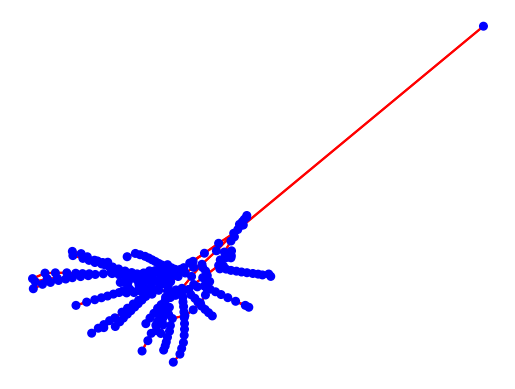

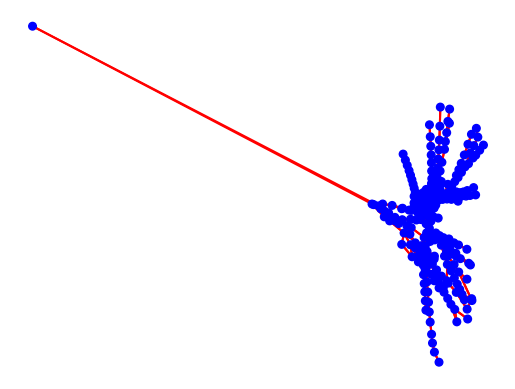

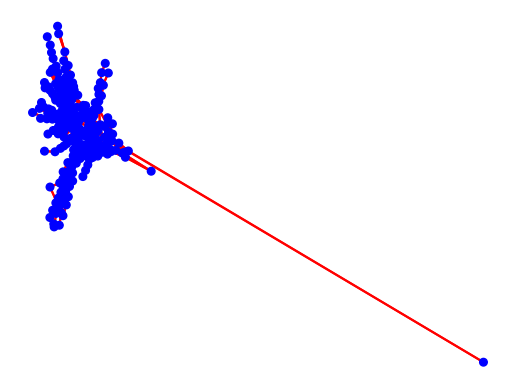

In [6]:
graph = pp.MultiOrderModel.from_PathData(tube, max_order=1).layers[1]
pp.plot(graph, layout=layout_2, backend='matplotlib')
pp.plot(graph, layout=layout_3, backend='matplotlib')
pp.plot(graph, layout=layout_5, backend='matplotlib')

In [7]:
#print(edge_crossing(tube, layout_2))
#print(edge_crossing(tube, layout_3))
#print(edge_crossing(tube, layout_5))

In [8]:
print(causal_path_dispersion(tube, layout_2, 3))
print(causal_path_dispersion(tube, layout_3, 3))
print(causal_path_dispersion(tube, layout_5, 3))

tensor(5.8622, dtype=torch.float64)
tensor(5.9344, dtype=torch.float64)
tensor(6.7131, dtype=torch.float64)


In [9]:
print(closeness_eccentricity(tube, layout_2, 3, 0.1))
print(closeness_eccentricity(tube, layout_3, 3, 0.1))
print(closeness_eccentricity(tube, layout_5, 3, 0.1))

/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:234: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  path_indices = torch.tensor(paths.mapping.to_idxs(path))


tensor(0.3063, dtype=torch.float64)
tensor(0.3664, dtype=torch.float64)
tensor(0.5894, dtype=torch.float64)
